In [77]:
%load_ext autoreload
%autoreload 2

In [78]:
import importlib
importlib.reload(ht)

<module 'hlathena' from 'c:\\git\\hlathenav2\\hlathena\\__init__.py'>

In [79]:
import hlathena as ht
import pandas as pd

In [80]:
from hlathena.peptide_dataset import PeptideDataset
from sklearn import preprocessing
from hlathena import definitions
from hlathena.amino_acid_feature_map import AminoAcidFeatureMap
from hlathena.pep_encoder import PepEncoder


In [81]:
sample_pep_file = "A0101_filtered.txt"
pep_df = pd.read_table(sample_pep_file, sep='\t')
pep_df = pep_df[['seq', 'length', 'backbone_cleav']]
pep_col = 'seq' # column containing peptide sequences

In [82]:
pep_df.shape

(1383, 3)

In [83]:
from hlathena.peptide_dataset import PeptideDataset
pds = PeptideDataset(pep_df, 
                     pep_col_name='seq',
                     allele_col_name = None)

In [84]:
pep_df.head()

,seq,length,backbone_cleav
0,ADMGHLKY,8,7
1,ELDDTLKY,8,6
2,FSDNIEFY,8,6
3,FTELAILY,8,6
4,GLDEPLLK,8,6


In [85]:
pds.pep_df.head()

,ha__pep,ha__pep_len,seq,length,backbone_cleav
0,ADMGHLKY,8,ADMGHLKY,8,7
1,ELDDTLKY,8,ELDDTLKY,8,6
2,FSDNIEFY,8,FSDNIEFY,8,6
3,FTELAILY,8,FTELAILY,8,6
4,GLDEPLLK,8,GLDEPLLK,8,6


In [86]:
pds.get_alleles()

In [87]:
pds.get_peptide_lengths()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19], dtype=int64)

In [88]:
pep_df.head()

,seq,length,backbone_cleav
0,ADMGHLKY,8,7
1,ELDDTLKY,8,6
2,FSDNIEFY,8,6
3,FTELAILY,8,6
4,GLDEPLLK,8,6


In [89]:
pds.pep_df.shape
pds.pep_df.iloc[0]['seq'] = 'cleo'


C:\Users\sarkizov\AppData\Local\Temp\ipykernel_15204\3231326532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pds.pep_df.iloc[0]['seq'] = 'cleo'


In [90]:
pds.subset_data(peplens=[9], reset_index=True)
pds.pep_df.head()


,ha__pep,ha__pep_len,seq,length,backbone_cleav
37,AADIFYSRY,9,AADIFYSRY,9,6
38,AADLNLVLY,9,AADLNLVLY,9,6
39,AADLVEALY,9,AADLVEALY,9,6
40,AIDEDVLRY,9,AIDEDVLRY,9,7
41,AIDLLKEIY,9,AIDLLKEIY,9,7


In [91]:
pds.get_peptide_lengths()

array([9], dtype=int64)

In [92]:
from hlathena.peptide_dataset import PeptideDataset
sample_pep_file = "A0101_filtered.txt"
pep_df = pd.read_table(sample_pep_file, sep='\t')
pep_df = pep_df[['seq', 'length', 'backbone_cleav']]
pep_df['allele'] = 'A0101'
pep_col = 'seq' # column containing peptide sequences
allele_col = 'allele' # column containing peptide sequences

In [93]:
pds = PeptideDataset(pep_df, 
                     pep_col_name='seq',
                     allele_col_name = 'allele')

In [94]:
pds.pep_df.head()

,ha__allele,ha__pep,ha__pep_len,seq,length,backbone_cleav,allele
0,A0101,ADMGHLKY,8,ADMGHLKY,8,7,A0101
1,A0101,ELDDTLKY,8,ELDDTLKY,8,6,A0101
2,A0101,FSDNIEFY,8,FSDNIEFY,8,6,A0101
3,A0101,FTELAILY,8,FTELAILY,8,6,A0101
4,A0101,GLDEPLLK,8,GLDEPLLK,8,6,A0101


In [95]:
pds.get_peptide_lengths()


array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 19], dtype=int64)

In [96]:
pds.get_allele_peptide_counts()

ValueError: No axis named 1 for object type Series

In [25]:
pds.get_alleles()

array(['A0101'], dtype=object)

In [24]:
pds.subset_data(alleles=['A0101'], peplens=[8,9])
len(pds)

525

In [25]:
pds.subset_data(alleles=['A0101', 'A0201'], peplens=[8,9])
len(pds)

525

In [26]:
from hlathena.amino_acid_feature_map import AminoAcidFeatureMap
#dir(AminoAcidFeatureMap)

In [27]:
import os
os.path.exists('../hlathena/data/kideraFactors.txt')

True

In [28]:
#aa_featurefiles=['../hlathena/data/kideraFactors.txt']
#aa_featurefiles=['../hlathena/data/aafeatmat_AAPropsPCA3.txt']
aa_featurefiles=['../hlathena/data/aafeatmat_KideraFactors.txt', '../hlathena/data/aafeatmat_AAPropsPCA3.txt']
aa_feature_map = AminoAcidFeatureMap(featurefiles=aa_featurefiles)

In [29]:
dir(aa_feature_map)

aa_feature_map.feature_files
aa_feature_map.feature_map
aa_feature_map.get_aa_featmap()


,KF1,KF2,KF3,KF4,KF5,KF6,KF7,KF8,KF9,KF10,PC1,PC2,PC3
A,-1.56,-1.67,-0.97,-0.27,-0.93,-0.78,-0.20,-0.08,0.21,-0.48,0.72,2.48,1.42
C,0.12,-0.89,0.45,-1.05,-0.71,2.41,1.52,-0.69,1.13,1.10,2.11,2.74,-3.84
D,0.58,-0.22,-1.58,0.81,-0.92,0.15,-1.52,0.47,0.76,0.70,-6.04,0.03,-0.18
E,-1.45,0.19,-1.61,1.17,-1.31,0.40,0.04,0.38,-0.35,-0.12,-5.70,0.34,-1.46
F,-0.21,0.98,-0.36,-1.43,0.22,-0.81,0.67,1.10,1.71,-0.44,7.18,-1.53,0.05
G,1.46,-1.96,-0.23,-0.16,0.10,-0.11,1.32,2.36,-1.66,0.46,-0.76,3.08,1.21
H,-0.41,0.52,-0.28,0.28,1.61,1.01,-1.85,0.47,1.13,1.63,-2.55,-1.00,-1.94
I,-0.73,-0.16,1.79,-0.77,-0.54,0.03,-0.83,0.51,0.66,-1.78,6.65,0.29,0.04
K,-0.34,0.82,-0.23,1.70,1.54,-1.62,1.15,-0.08,-0.48,0.60,-6.68,-1.32,1.16
L,-1.04,0.00,-0.24,-1.10,-0.55,-2.05,0.96,-0.76,0.45,0.93,6.59,-0.20,1.17


In [30]:
from sklearn import preprocessing
from hlathena import definitions


pds.subset_data(alleles=['A0101', 'A0201'], peplens=[9])
len(pds)
pds.get_pep_lengths()

#peps_split = self._split_peptides()
encoder = preprocessing.OneHotEncoder(
    categories=[definitions.AMINO_ACIDS] * 9)
encoder.fit(pds._split_peptides())
encoded = encoder.transform(pds._split_peptides()).toarray()

encoded.shape
encoded[0].sum()

9.0

In [31]:
aa_feature_map.get_aa_featmap()

,KF1,KF2,KF3,KF4,KF5,KF6,KF7,KF8,KF9,KF10,PC1,PC2,PC3
A,-1.56,-1.67,-0.97,-0.27,-0.93,-0.78,-0.20,-0.08,0.21,-0.48,0.72,2.48,1.42
C,0.12,-0.89,0.45,-1.05,-0.71,2.41,1.52,-0.69,1.13,1.10,2.11,2.74,-3.84
D,0.58,-0.22,-1.58,0.81,-0.92,0.15,-1.52,0.47,0.76,0.70,-6.04,0.03,-0.18
E,-1.45,0.19,-1.61,1.17,-1.31,0.40,0.04,0.38,-0.35,-0.12,-5.70,0.34,-1.46
F,-0.21,0.98,-0.36,-1.43,0.22,-0.81,0.67,1.10,1.71,-0.44,7.18,-1.53,0.05
G,1.46,-1.96,-0.23,-0.16,0.10,-0.11,1.32,2.36,-1.66,0.46,-0.76,3.08,1.21
H,-0.41,0.52,-0.28,0.28,1.61,1.01,-1.85,0.47,1.13,1.63,-2.55,-1.00,-1.94
I,-0.73,-0.16,1.79,-0.77,-0.54,0.03,-0.83,0.51,0.66,-1.78,6.65,0.29,0.04
K,-0.34,0.82,-0.23,1.70,1.54,-1.62,1.15,-0.08,-0.48,0.60,-6.68,-1.32,1.16
L,-1.04,0.00,-0.24,-1.10,-0.55,-2.05,0.96,-0.76,0.45,0.93,6.59,-0.20,1.17


In [32]:
pds.get_pep_lengths()

array([9], dtype=int64)

In [33]:
from hlathena import PepEncoder
encoded = PepEncoder.get_encoded_peps(
    pds.get_peptide_list(),
    aa_feature_map)

encoded.head()
encoded.columns

Index(['p1_KF1', 'p1_KF2', 'p1_KF3', 'p1_KF4', 'p1_KF5', 'p1_KF6', 'p1_KF7',
       'p1_KF8', 'p1_KF9', 'p1_KF10',
       ...
       'p9_KF4', 'p9_KF5', 'p9_KF6', 'p9_KF7', 'p9_KF8', 'p9_KF9', 'p9_KF10',
       'p9_PC1', 'p9_PC2', 'p9_PC3'],
      dtype='object', length=117)

In [34]:
feature_matrix = ht.PCA_encode(pds.pep_df['seq'].values, 
                               'A0101', 
                               9, 
                               AminoAcidFeatureMap(featurefiles=['../hlathena/data/aafeatmat_KideraFactors.txt']), 
                               save_PCA_path='pca_encoding.npz')

In [35]:
tmp = AminoAcidFeatureMap(featurefiles=['../hlathena/data/aafeatmat_KideraFactors.txt'])
tmp.get_aa_featmap()
tmp.get_feature_count() # TO DO - adjust the feature count to reflect per position vs overall; or two function for each of the two options (n_features per position vs all positions combined)
#tmp.feature_count

10

In [36]:
feature_matrix.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89
0,-2.123443,0.594849,0.034589,-0.176814,-0.676162,-0.000889,-0.145604,0.646932,-0.108215,0.047086,...,0.000517,-0.047559,-0.002669,0.044962,0.016497,0.006554,0.009890,-0.008719,-0.000889,0.002806
1,-2.141438,0.580198,0.042811,-0.149800,-0.676054,0.005552,-0.163232,0.665911,-0.129758,0.043952,...,0.046090,-0.018292,-0.026537,0.029038,0.007307,-0.040861,0.011272,0.007051,-0.008795,0.000367
2,-2.149360,0.584679,0.029708,-0.140366,-0.678883,0.007149,-0.158774,0.667791,-0.130416,0.006919,...,-0.019791,-0.049400,0.000539,0.031750,0.026424,0.018966,-0.023970,-0.033783,-0.004824,-0.000746
3,-2.102170,0.020466,0.227298,-1.221987,0.048658,0.014690,-0.419409,0.259334,0.346230,-0.016964,...,0.005274,0.003058,-0.018053,-0.000963,0.003953,-0.014820,-0.025752,0.003597,0.001939,0.001230
4,-2.088126,0.031348,0.199712,-1.267676,0.016694,0.015824,-0.390050,0.242377,0.328697,0.127737,...,0.011454,-0.094927,-0.036954,-0.033594,-0.015552,0.019562,0.002659,-0.000503,0.001344,-0.000098


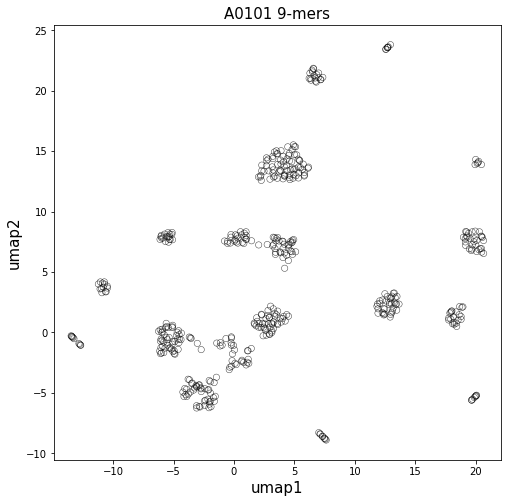

In [32]:
umap_embedding = ht.get_umap_embedding(feature_matrix)
ht.plot_umap(umap_embedding, title='A0101 9-mers')


In [165]:
pds.featurize_peps(,
        aa_featurefiles: Optional[Union[str, List[str]]] = None,
        feat_cols: Optional[Union[str, List[str]]] = None)

SyntaxError: invalid syntax (4089933229.py, line 1)